In [460]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import compose, ensemble, impute, linear_model, metrics, model_selection, pipeline, preprocessing, svm, tree

In [455]:
_dtype = {
    "MSSubClass": pd.CategoricalDtype([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190]),
    "MSZoning": pd.CategoricalDtype(['A', 'C', "FV", 'I', "RH", "RL", "RP", "RM"]),
    "Street": pd.CategoricalDtype(["Grvl", "Pave"]),
    "Alley": pd.CategoricalDtype(["Grvl", "Pave"]),
    "LotShape": pd.CategoricalDtype(["Reg", "IR1", "IR2", "IR3"]),
    "LandContour": pd.CategoricalDtype(["Lvl", "Bnk", "HLS", "Low"]),
    "Utilities": pd.CategoricalDtype(["AllPub", "NoSewr", "NoSeWa", "ELO"]),
    "LotConfig": pd.CategoricalDtype(["Inside", "Corner", "CulDSac", "FR2", "FR3"]),
    "LandSlope": pd.CategoricalDtype(["Gtl", "Mod", "Sev"]),
    "Neighborhood": pd.CategoricalDtype(["Blmngtn", "Blueste", "BrDale", "BrkSide", "ClearCr", "CollgCr", "Crawfor", "Edwards", "Gilbert", "IDOTRR", "MeadowV", "Mitchel", "Names", "NoRidge", "NPkVill", "NridgHt", "NWAmes", "OldTown", "SWISU", "Sawyer", "SawyerW", "Somerst", "StoneBr", "Timber", "Veenker"]),
    "Condition1": pd.CategoricalDtype(["Artery", "Feedr", "Norm", "RRNn", "RRAn", "PosN", "PosA", "RNNe", "RRAe"]),
    "Condition2": pd.CategoricalDtype(["Artery", "Feedr", "Norm", "RRNn", "RRAn", "PosN", "PosA", "RNNe", "RRAe"]),
    "BldgType": pd.CategoricalDtype(["1Fam", "2FmCon", "Duplx", "TwnhsE", "TwnhsI"]),
    "HouseStyle": pd.CategoricalDtype(["1Story", "1.5Fin", "1.5Unf", "2Story", "2.5Fin", "2.5Unf", "SFoyer", "SLvl"]),
    "OverallQual": pd.CategoricalDtype(range(1, 11), ordered=True),
    "OverallCond": pd.CategoricalDtype(range(1, 11), ordered=True),
    "RoofStyle": pd.CategoricalDtype(["Flat", "Gable", "Gambrel", "Hip", "Mansard", "Shed"]),
    "RoofMatl": pd.CategoricalDtype(["ClyTile", "CompShg", "Membran", "Metal", "Roll", "Tar&Grv", "WdShake", "WdShngl"]),
    "Exterior1st": pd.CategoricalDtype(["AsbShng", "AsphShn", "BrkComm", "BrkFace", "CBlock", "CemntBd", "HdBoard", "ImStucc", "MetalSd", "Other", "Plywood", "PreCast", "Stone", "Stucco", "VinylSd", "Wd Sdng", "WdShing"]),
    "Exterior2nd": pd.CategoricalDtype(["AsbShng", "AsphShn", "BrkComm", "BrkFace", "CBlock", "CemntBd", "HdBoard", "ImStucc", "MetalSd", "Other", "Plywood", "PreCast", "Stone", "Stucco", "VinylSd", "Wd Sdng", "WdShing"]),
    "MasVnrType": pd.CategoricalDtype(["BrkCmn", "BrkFace", "CBlock", "None", "Stone"]),
    "ExterQual": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "ExterCond": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "Foundation": pd.CategoricalDtype(["BrkTile", "CBlock", "PConc", "Slab", "Stone", "Wood"]),
    "BsmtQual": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "BsmtCond": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "BsmtExposure": pd.CategoricalDtype(["No", "Mn", "Av", "Gd"], ordered=True),
    "BsmtFinType1": pd.CategoricalDtype(["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True),
    "BsmtFinType2": pd.CategoricalDtype(["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True),
    "Heating": pd.CategoricalDtype(["Floor", "GasA", "GasW", "Grav", "OthW", "Wall"]),
    "HeatingQC": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "CentralAir": pd.CategoricalDtype(['Y', 'N']),
    "Electrical": pd.CategoricalDtype(["SBrkr", "FuseA", "FuseF", "FuseP", "Mix"]),
    "KitchenQual": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "Functional": pd.CategoricalDtype(["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], ordered=True),
    "FireplaceQu": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "GarageType": pd.CategoricalDtype(["2Types", "Attchd", "Basment", "BuiltIn", "CarPort", "Detchd"]),
    "GarageFinish": pd.CategoricalDtype(["Unf", "RFn", "Fin"], ordered=True),
    "GarageQual": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "GarageCond": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "PavedDrive": pd.CategoricalDtype(['N', 'P', 'Y'], ordered=True),
    "PoolQC": pd.CategoricalDtype(["Po", "Fa", "TA", "Gd", "Ex"], ordered=True),
    "Fence": pd.CategoricalDtype(["MnWw", "GdWo", "MnPrv", "GdPrv"], ordered=True),
    "MiscFeature": pd.CategoricalDtype(["Elev", "Gar2", "Othr", "Shed", "TenC"]),
    "SaleType": pd.CategoricalDtype(["WD", "CWD", "VWD", "New", "COD", "Con", "ConLw", "ConLI", "ConLD", "Oth"]),
    "SaleCondition": pd.CategoricalDtype(["Normal", "Abnormal", "AdjLand", "Alloca", "Family", "Partial"])
}

training_df = pd.read_csv("../data/ames-housing-data/train.csv",
                          dtype=_dtype,
                          index_col="Id")

In [456]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null category
MSZoning         1450 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1235 non-null category
Condition1       1458 non-null category
Condition2       1460 non-null category
BldgType         1334 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non

In [457]:
training_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,NaN,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [458]:
training_df.loc[:, "Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

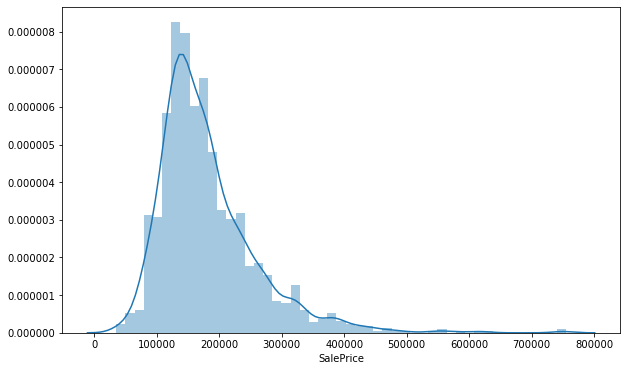

In [459]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
_ = sns.distplot(training_df.loc[:, "SalePrice"], ax=ax)

# Numerical Features

In [228]:
numeric_features = (training_df.dtypes[training_df.dtypes != "category"]
                               .index
                               .drop("SalePrice"))

In [229]:
numeric_features

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

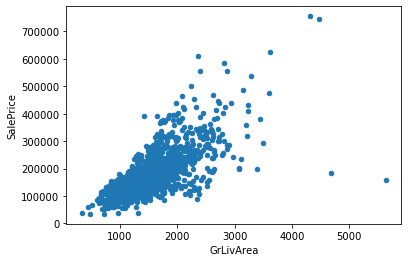

In [230]:
_ = (training_df.loc[:, ["GrLivArea", "SalePrice"]]
                .plot
                .scatter(x="GrLivArea", y="SalePrice"))

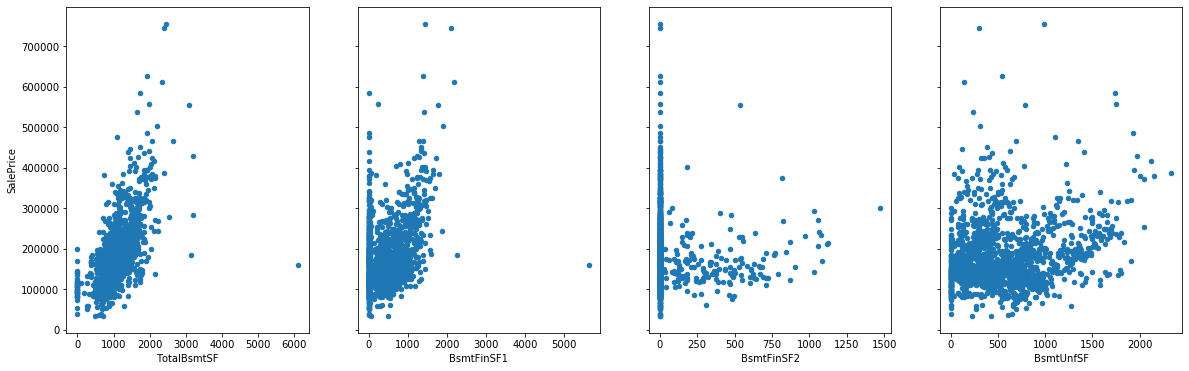

In [188]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

_ = (training_df.loc[:, ["TotalBsmtSF", "SalePrice"]]
                .plot
                .scatter(x="TotalBsmtSF", y="SalePrice", ax=axes[0]))

_ = (training_df.loc[:, ["BsmtFinSF1", "SalePrice"]]
                .plot
                .scatter(x="BsmtFinSF1", y="SalePrice", ax=axes[1]))

_ = (training_df.loc[:, ["BsmtFinSF2", "SalePrice"]]
                .plot
                .scatter(x="BsmtFinSF2", y="SalePrice", ax=axes[2]))

_ = (training_df.loc[:, ["BsmtUnfSF", "SalePrice"]]
                .plot
                .scatter(x="BsmtUnfSF", y="SalePrice", ax=axes[3]))

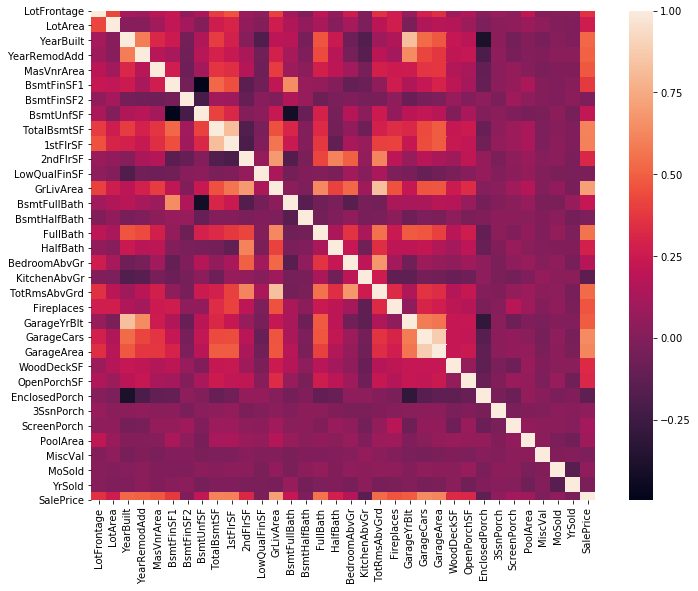

In [189]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(training_df.corr(), vmax=1.0, square=True, ax=ax);

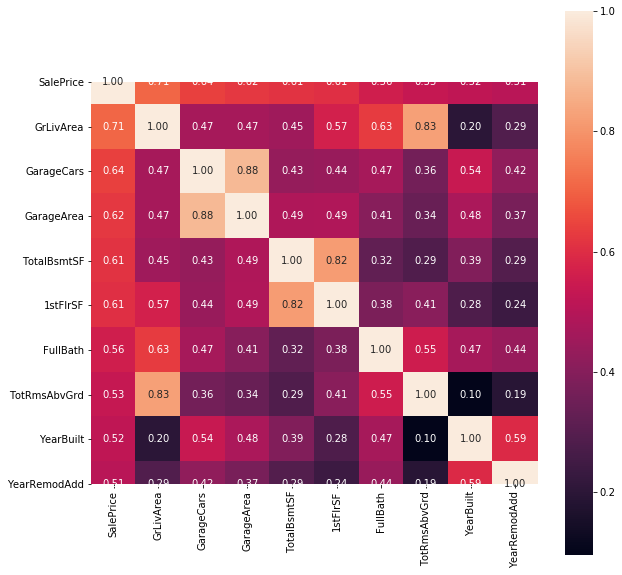

In [190]:
most_correlated_features = (training_df.corr()
                                       .nlargest(10, 'SalePrice')
                                       .loc[:, 'SalePrice']
                                       .index)

_data = (training_df.loc[:, most_correlated_features]
                    .corr())
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
_ = sns.heatmap(_data, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, ax=ax)


In [307]:
numeric_features_preprocessing = pipeline.Pipeline(
    steps=[("simple_imputer", impute.SimpleImputer(strategy="mean"))],
    verbose=True
)

In [125]:
_hyper_parameters = {
    "epsilon": 0.0,
    "C": 1.0,
}

_prng = np.random.RandomState(42)
linear_svr = svm.LinearSVR(random_state=_prng, **_hyper_parameters)

Init signature:
svm.LinearSVR(
    epsilon=0.0,
    tol=0.0001,
    C=1.0,
    loss='epsilon_insensitive',
    fit_intercept=True,
    intercept_scaling=1.0,
    dual=True,
    verbose=0,
    random_state=None,
    max_iter=1000,
)
Docstring:     
Linear Support Vector Regression.

Similar to SVR with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

This class supports both dense and sparse input.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
epsilon : float, optional (default=0.0)
    Epsilon parameter in the epsilon-insensitive loss function. Note
    that the value of this parameter depends on the scale of the target
    variable y. If unsure, set ``epsilon=0``.

tol : float, optional (default=1e-4)
    Tolerance for stopping criteria.

C : float, optional (default=1.0)
    Penalty parameter 

# Ordinal Features

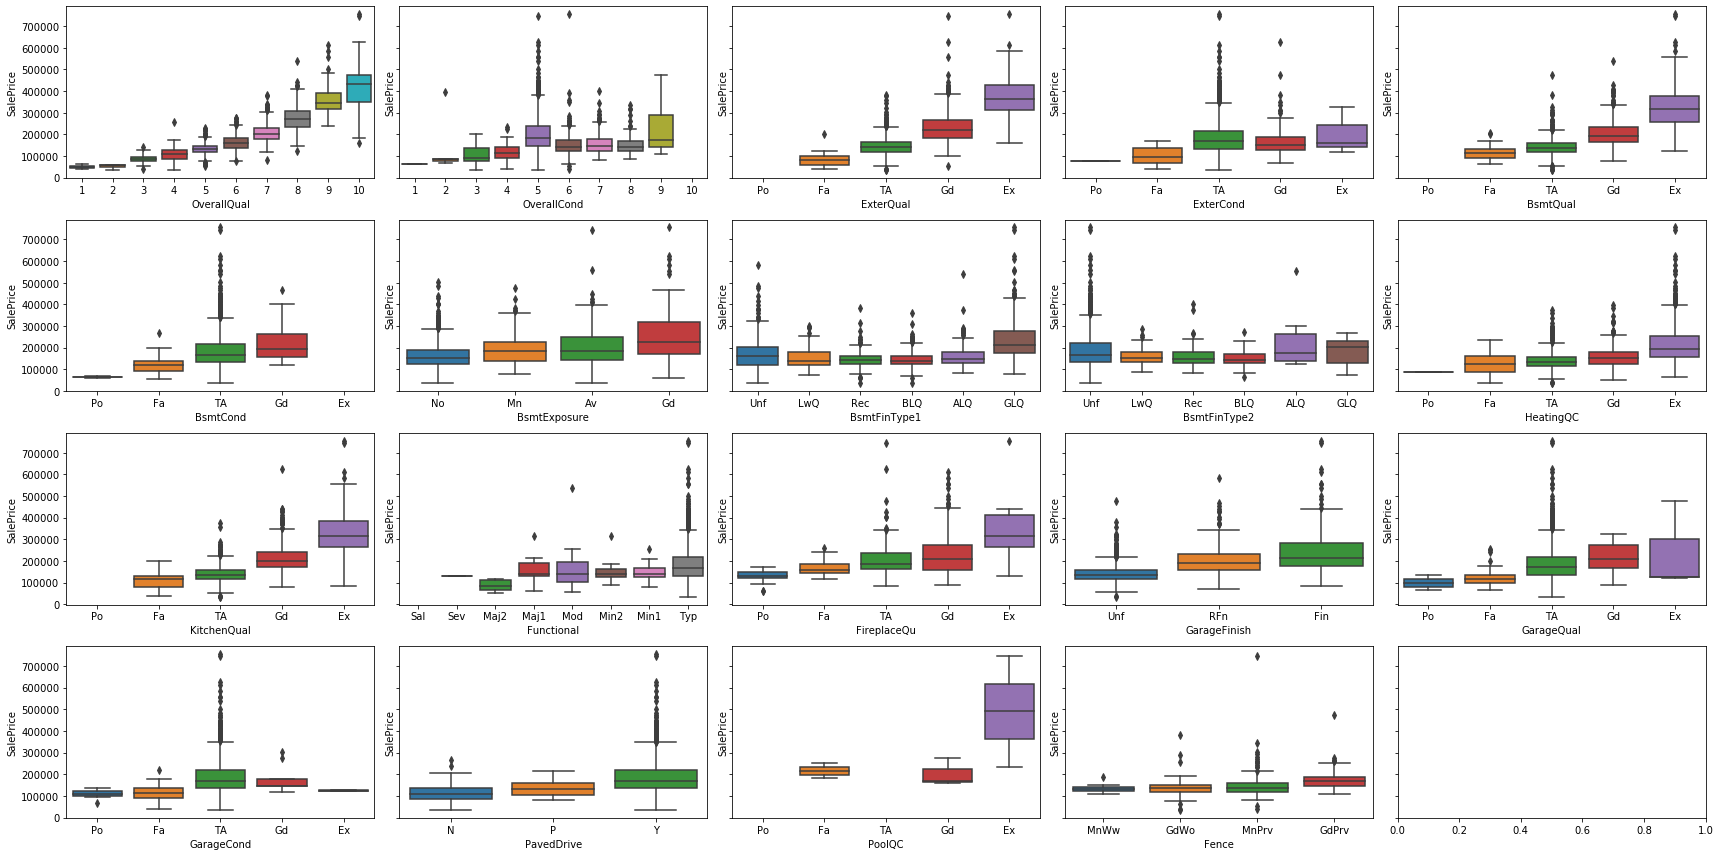

In [244]:
non_numeric_features = (training_df.dtypes[training_df.dtypes == "category"]
                                   .index)

_is_ordinal = lambda col_name: training_df.loc[:, col_name].cat.ordered
ordinal_features = [feature for feature in non_numeric_features if _is_ordinal(feature)]

fig, axes = plt.subplots(4, 5, figsize=(24, 12), sharey=True)
for i, feature in enumerate(ordinal_features):
    if i < 5:
        _ = sns.boxplot(x=feature, y="SalePrice", data=training_df, ax=axes[0, i])
    elif 5 <= i < 10:
        _ = sns.boxplot(x=feature, y="SalePrice", data=training_df, ax=axes[1, i - 5])
    elif 10 <= i < 15:
        _ = sns.boxplot(x=feature, y="SalePrice", data=training_df, ax=axes[2, i - 10])
    else:
        _ = sns.boxplot(x=feature, y="SalePrice", data=training_df, ax=axes[3, i - 15])
fig.tight_layout()

# Categorical Features

In [247]:
categorical_features = [feature for feature in non_numeric_features if not _is_ordinal(feature)]

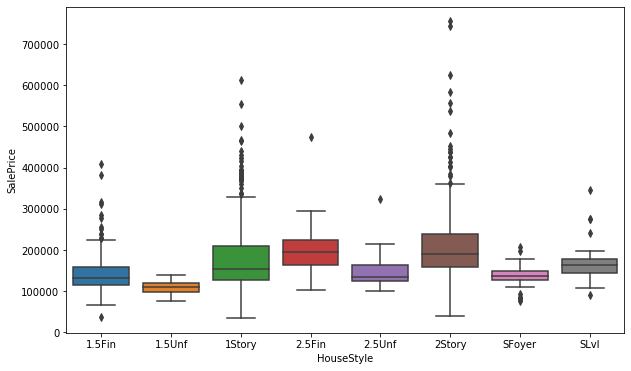

In [115]:
fig, ax = plt.subplots(figsize=(10, 6))
_data = training_df.loc[:, ["HouseStyle", "SalePrice"]]
_ = sns.boxplot(x="HouseStyle", y="SalePrice", data=_data, ax=ax)


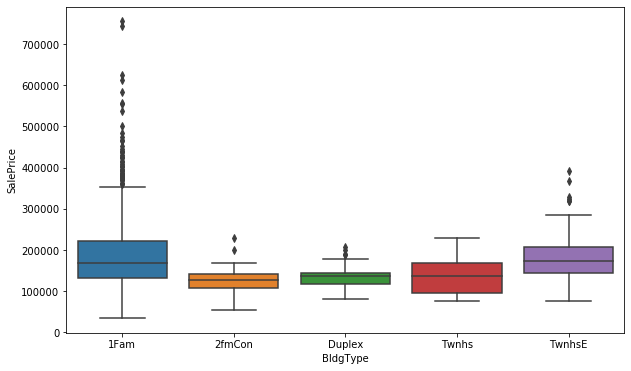

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))
_data = training_df.loc[:, ["BldgType", "SalePrice"]]
_ = sns.boxplot(x="BldgType", y="SalePrice", data=_data, ax=ax)


In [308]:
_categories = [training_df.loc[:, feature].cat.categories for feature in categorical_features]
_categorical_steps = [
    ("simple_imputer", impute.SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder", preprocessing.OneHotEncoder(categories=_categories))
]

categorical_features_preprocessing = pipeline.Pipeline(
    steps=_categorical_steps,
    verbose=True
)

_categories = [training_df.loc[:, feature].cat.categories for feature in ordinal_features]
_ordinal_steps = [
    ("simple_imputer", impute.SimpleImputer(strategy="most_frequent")),
    ("ordinal_encoder", preprocessing.OrdinalEncoder(categories=_categories))
]

ordinal_features_preprocessing = pipeline.Pipeline(
    steps=_ordinal_steps,
    verbose=True
)

# Preprocessing Pipeline

In [309]:
_transformers = [
    ("numeric_features_preprocessing", numeric_features_preprocessing, numeric_features),
    ("ordinal_features_preprocessing", ordinal_features_preprocessing, ordinal_features),
    ("categorical_features_preprocessing", categorical_features_preprocessing, categorical_features)
]

preprocessing_pipeline = compose.ColumnTransformer(
    n_jobs=3,
    remainder="drop",
    transformers=_transformers,
    verbose=True
)

# Load the testing data

In [313]:
# load the testing features (note we use transform method and NOT fit_transform!)
testing_df = pd.read_csv("../data/ames-housing-data/test.csv",
                         dtype=_dtype,
                         index_col="Id")

In [312]:
testing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Linear regression benchmark

In [310]:
Z = preprocessing_pipeline.fit_transform(training_df.drop("SalePrice", axis=1))
y = training_df.loc[:, "SalePrice"]

_regressor = linear_model.LinearRegression()
linear_regression = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)
linear_regression.fit(Z, y)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           transformer=None)

In [328]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(linear_regression, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"Linear Regression Training Error: {_rmse}")

Linear Regression Training Error: 0.1567014818685724


## Make predictions

In [361]:
def predict_sales_price(preprocessing_pipeline, regressor, testing_df):
    Z = preprocessing_pipeline.transform(testing_df)
    return regressor.predict(Z)


def create_kaggle_submission(predictions):
    if not os.path.isdir("../data/ames-housing-data/kaggle-submissions/"):
        os.makedirs("../data/ames-housing-data/kaggle-submissions/")
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    df = pd.DataFrame({"Id": range(1461, 2920), "SalePrice": predictions})
    df.to_csv(f"../data/ames-housing-data/kaggle-submissions/submission-{timestamp}.csv", index=False)
    

## Submit to Kaggle

In [317]:
# make predictions using linear regression model
_predictions = predict_sales_price(preprocessing_pipeline, linear_regression, testing_df)
create_kaggle_submission(_predictions)

In [315]:
%%bash
kaggle competitions submit house-prices-advanced-regression-techniques \
  -f $(ls ../data/ames-housing-data/kaggle-submissions/linear-regression-submission-*.csv | tail -n 1) \
  -m "Linear Regression Benchmark: all features."

Successfully submitted to House Prices: Advanced Regression Techniques

100%|██████████| 33.6k/33.6k [00:06<00:00, 4.94kB/s]


# ElasticNet benchmark

In [337]:
_transformers = [
    ("numeric_features_preprocessing", numeric_features_preprocessing, numeric_features),
    ("ordinal_features_preprocessing", ordinal_features_preprocessing, ordinal_features),
    ("categorical_features_preprocessing", categorical_features_preprocessing, categorical_features)
]

preprocessing_pipeline = compose.ColumnTransformer(
    n_jobs=3,
    remainder="drop",
    transformers=_transformers,
    verbose=True
)

In [338]:
Z = preprocessing_pipeline.fit_transform(training_df.drop("SalePrice", axis=1))
y = training_df.loc[:, "SalePrice"]

_hyper_parameters = {
    "alpha": 1.0,
    "l1_ratio": 0.5
}
_random_state = np.random.RandomState(42)
_regressor = linear_model.ElasticNet(random_state=_random_state, **_hyper_parameters)
elastic_net = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)
elastic_net.fit(Z, y)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=ElasticNet(alpha=1.0, copy_X=True,
                                                fit_intercept=True,
                                                l1_ratio=0.5, max_iter=1000,
                                                normalize=False, positive=False,
                                                precompute=False,
                                                random_state=RandomState(MT19937) at 0x14BD9D560570,
                                                selection='cyclic', tol=0.0001,
                                                warm_start=False),
                           transformer=None)

In [339]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(elastic_net, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"ElasticNet Training Error: {_rmse}")

ElasticNet Training Error: 0.19402447060027192


## ElasticNetCV benchmark

In [331]:
Z = preprocessing_pipeline.fit_transform(training_df.drop("SalePrice", axis=1))
y = training_df.loc[:, "SalePrice"]

_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)

_hyper_parameters = {
    "eps": 1e-3,
    "l1_ratio": 0.5,
    "n_alphas": 100
}

_random_state = np.random.RandomState(84)
_regressor = linear_model.ElasticNetCV(cv=_cv, n_jobs=5, random_state=_random_state, **_hyper_parameters)
elastic_net = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)
elastic_net.fit(Z, y)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=ElasticNetCV(alphas=None, copy_X=True,
                                                  cv=KFold(n_splits=5, random_state=RandomState(MT19937) at 0x14BD92369EB8,
   shuffle=False),
                                                  eps=0.001, fit_intercept=True,
                                                  l1_ratio=0.5, max_iter=1000,
                                                  n_alphas=100, n_jobs=5,
                                                  normalize=False,
                                                  positive=False,
                                                  precompute='auto',
                                                  random_state=RandomState(MT19937) at 0x14BD92369BA0,
                                                  selection='cyclic',
                                                  

In [332]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(elastic_net, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"ElasticNet Training Error: {_rmse}")

ElasticNet Training Error: 0.20170835973512713


# LinearSRV benchmark

In [340]:
svm.LinearSVR?

Init signature:
svm.LinearSVR(
    epsilon=0.0,
    tol=0.0001,
    C=1.0,
    loss='epsilon_insensitive',
    fit_intercept=True,
    intercept_scaling=1.0,
    dual=True,
    verbose=0,
    random_state=None,
    max_iter=1000,
)
Docstring:     
Linear Support Vector Regression.

Similar to SVR with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

This class supports both dense and sparse input.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
epsilon : float, optional (default=0.0)
    Epsilon parameter in the epsilon-insensitive loss function. Note
    that the value of this parameter depends on the scale of the target
    variable y. If unsure, set ``epsilon=0``.

tol : float, optional (default=1e-4)
    Tolerance for stopping criteria.

C : float, optional (default=1.0)
    Penalty parameter 

In [352]:
numeric_features_preprocessing = pipeline.Pipeline(
    steps=[("simple_imputer", impute.SimpleImputer(strategy="mean")), ("standard_scaler", preprocessing.StandardScaler())],
    verbose=True
)

_transformers = [
    ("numeric_features_preprocessing", numeric_features_preprocessing, numeric_features),
    ("ordinal_features_preprocessing", ordinal_features_preprocessing, ordinal_features),
    ("categorical_features_preprocessing", categorical_features_preprocessing, categorical_features)
]

preprocessing_pipeline = compose.ColumnTransformer(
    n_jobs=3,
    remainder="drop",
    transformers=_transformers,
    verbose=True
)

Z = preprocessing_pipeline.fit_transform(training_df.drop("SalePrice", axis=1))
y = training_df.loc[:, "SalePrice"]

_hyper_parameters = {
    "epsilon": 0.0,
    "C": 1.0,
    "loss": "squared_epsilon_insensitive",
    "max_iter": 1000
}
_random_state = np.random.RandomState(42)
_regressor = svm.LinearSVR(dual=False, random_state=_random_state, **_hyper_parameters)
transformed_target_regressor = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)
transformed_target_regressor.fit(Z, y)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=LinearSVR(C=1.0, dual=False, epsilon=0.0,
                                               fit_intercept=True,
                                               intercept_scaling=1.0,
                                               loss='squared_epsilon_insensitive',
                                               max_iter=1000,
                                               random_state=RandomState(MT19937) at 0x14BD92269888,
                                               tol=0.0001, verbose=0),
                           transformer=None)

In [354]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(transformed_target_regressor, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"LinearSVR Training Error: {_rmse}")

LinearSVM Training Error: 0.2064937068644002


# SVR benchmark

In [358]:
numeric_features_preprocessing = pipeline.Pipeline(
    steps=[("simple_imputer", impute.SimpleImputer(strategy="mean")), ("standard_scaler", preprocessing.StandardScaler())],
    verbose=True
)

_transformers = [
    ("numeric_features_preprocessing", numeric_features_preprocessing, numeric_features),
    ("ordinal_features_preprocessing", ordinal_features_preprocessing, ordinal_features),
    ("categorical_features_preprocessing", categorical_features_preprocessing, categorical_features)
]

preprocessing_pipeline = compose.ColumnTransformer(
    n_jobs=3,
    remainder="drop",
    transformers=_transformers,
    verbose=True
)

Z = preprocessing_pipeline.fit_transform(training_df.drop("SalePrice", axis=1))
y = training_df.loc[:, "SalePrice"]

_hyper_parameters = {
    "kernel": "rbf",
    "gamma": "scale",
    "C": 1.0,
    "epsilon": 1e-1
}

_regressor = svm.SVR( **_hyper_parameters)
transformed_target_regressor = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)
transformed_target_regressor.fit(Z, y)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=SVR(C=1.0, cache_size=200, coef0=0.0,
                                         degree=3, epsilon=0.1, gamma='scale',
                                         kernel='rbf', max_iter=-1,
                                         shrinking=True, tol=0.001,
                                         verbose=False),
                           transformer=None)

In [359]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(transformed_target_regressor, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"SVR Training Error: {_rmse}")

SVR Training Error: 0.12695520954694317


In [362]:
# make predictions using linear regression model
_predictions = predict_sales_price(preprocessing_pipeline, transformed_target_regressor, testing_df)
create_kaggle_submission(_predictions)

In [363]:
%%bash
kaggle competitions submit house-prices-advanced-regression-techniques \
  -f $(ls ../data/ames-housing-data/kaggle-submissions/submission-*.csv | tail -n 1) \
  -m "SVR Benchmark: all features."

Successfully submitted to House Prices: Advanced Regression Techniques

100%|██████████| 33.7k/33.7k [00:08<00:00, 4.11kB/s]


# DecisionTreeRegressor benchmark

In [366]:
numeric_features_preprocessing = pipeline.Pipeline(
    steps=[("simple_imputer", impute.SimpleImputer(strategy="mean"))],
    verbose=True
)

_transformers = [
    ("numeric_features_preprocessing", numeric_features_preprocessing, numeric_features),
    ("ordinal_features_preprocessing", ordinal_features_preprocessing, ordinal_features),
    ("categorical_features_preprocessing", categorical_features_preprocessing, categorical_features)
]

preprocessing_pipeline = compose.ColumnTransformer(
    n_jobs=3,
    remainder="drop",
    transformers=_transformers,
    verbose=True
)

Z = preprocessing_pipeline.fit_transform(training_df.drop("SalePrice", axis=1))
y = training_df.loc[:, "SalePrice"]

_hyper_parameters = {
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "min_weight_fraction_leaf": 0.0,
    "max_features": None,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "min_impurity_split": None,
}

_random_state = np.random.RandomState(42)
_regressor = tree.DecisionTreeRegressor(random_state=_random_state, **_hyper_parameters)
transformed_target_regressor = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)
transformed_target_regressor.fit(Z, y)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'log'>,
                           inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(criterion='mse',
                                                           max_depth=None,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           presort=False,
                                                           random_state=Rando

In [382]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(transformed_target_regressor, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"DecisionTreeRegressor Training Error: {_rmse}")

DecisionTreeRegressor Training Error: 0.2084045211499178


In [392]:
_hyper_parameters = {
    "regressor__max_depth": [2, 4, 8, 16, None],
    "regressor__min_samples_split": [2, 4, 8, 16],
    "regressor__min_samples_leaf": [1, 2, 4, 8, 16, 32],
}

_random_state = np.random.RandomState(42)
_regressor = tree.DecisionTreeRegressor(random_state=_random_state)
transformed_target_regressor = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)

_random_state = np.random.RandomState(84)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
grid_search_cv = model_selection.GridSearchCV(transformed_target_regressor, cv=_cv, param_grid=_hyper_parameters, n_jobs=-1, verbose=10)
grid_search_cv.fit(Z, y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0874s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0874s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 396 out of 600 | elapsed:    5.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=RandomState(MT19937) at 0x14BD9D560150,
   shuffle=False),
             error_score='raise-deprecating',
             estimator=TransformedTargetRegressor(check_inverse=True,
                                                  func=<ufunc 'log'>,
                                                  inverse_func=<ufunc 'exp'>,
                                                  regressor=DecisionTreeRegressor(criterion='mse',
                                                                                  max_depth=None,
                                                                                  max_features=None,
                                                                                  max_leaf_nodes=None,
                                                                                  min_impurity_decrea...
                                                                                  min_weight_fraction_leaf=0.0,
            

In [393]:
grid_search_cv.best_params_

{'regressor__max_depth': None,
 'regressor__min_samples_leaf': 2,
 'regressor__min_samples_split': 16}

In [395]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(grid_search_cv, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"DecisionTreeRegressor Training Error: {_rmse}")

DecisionTreeRegressor Training Error: 0.19307742397058306


In [389]:
# make predictions using linear regression model
_predictions = predict_sales_price(preprocessing_pipeline, grid_search_cv, testing_df)
create_kaggle_submission(_predictions)

In [390]:
%%bash
kaggle competitions submit house-prices-advanced-regression-techniques \
  -f $(ls ../data/ames-housing-data/kaggle-submissions/submission-*.csv | tail -n 1) \
  -m "Tuned DecisionTreeRegressor: all features."

Successfully submitted to House Prices: Advanced Regression Techniques

100%|██████████| 33.7k/33.7k [00:05<00:00, 6.09kB/s]


In [475]:
numeric_features_preprocessing = pipeline.Pipeline(
    steps=[("simple_imputer", impute.SimpleImputer(strategy="mean"))],
    verbose=True
)

_transformers = [
    ("numeric_features_preprocessing", numeric_features_preprocessing, numeric_features),
    ("ordinal_features_preprocessing", ordinal_features_preprocessing, ordinal_features),
    ("categorical_features_preprocessing", categorical_features_preprocessing, categorical_features)
]

preprocessing_pipeline = compose.ColumnTransformer(
    n_jobs=3,
    remainder="drop",
    transformers=_transformers,
    verbose=True
)

Z = preprocessing_pipeline.fit_transform(training_df.drop("SalePrice", axis=1))
y = training_df.loc[:, "SalePrice"]

_hyper_parameters = {
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "min_weight_fraction_leaf": 0.0,
    "max_features": None,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "min_impurity_split": None,
}

_random_state = np.random.RandomState(42)
_regressor = tree.DecisionTreeRegressor(random_state=_random_state, **_hyper_parameters)
_transformed_target_regressor = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)

bagging_regressor = ensemble.BaggingRegressor(base_estimator=_transformed_target_regressor, bootstrap=True, n_estimators=2 * 72, n_jobs=72, oob_score=True, random_state=_random_state, verbose=10)
bagging_regressor.fit(Z, y)


[Parallel(n_jobs=72)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=72)]: Done   9 out of  72 | elapsed:    0.8s remaining:    5.8s
[Parallel(n_jobs=72)]: Done  17 out of  72 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=72)]: Done  25 out of  72 | elapsed:    1.1s remaining:    2.0s
[Parallel(n_jobs=72)]: Done  33 out of  72 | elapsed:    1.1s remaining:    1.3s
[Parallel(n_jobs=72)]: Done  41 out of  72 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=72)]: Done  49 out of  72 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=72)]: Done  57 out of  72 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=72)]: Done  65 out of  72 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=72)]: Done  72 out of  72 | elapsed:    1.7s finished


BaggingRegressor(base_estimator=TransformedTargetRegressor(check_inverse=True,
                                                           func=<ufunc 'log'>,
                                                           inverse_func=<ufunc 'exp'>,
                                                           regressor=DecisionTreeRegressor(criterion='mse',
                                                                                           max_depth=None,
                                                                                           max_features=None,
                                                                                           max_leaf_nodes=None,
                                                                                           min_impurity_decrease=0.0,
                                                                                           min_impurity_split=None,
                                                                                    

In [476]:
bagging_regressor.oob_score_

0.8596942836947873

In [472]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(bagging_regressor, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"BaggingRegressor Training Error: {_rmse}")

BaggingRegressor Training Error: 0.1445160488834316


In [473]:
# create a kaggle submission
_predictions = predict_sales_price(preprocessing_pipeline, bagging_regressor, testing_df)
create_kaggle_submission(_predictions)

[Parallel(n_jobs=72)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=72)]: Batch computation too fast (0.1227s.) Setting batch_size=2.
[Parallel(n_jobs=72)]: Done   9 out of  72 | elapsed:    0.7s remaining:    4.9s
[Parallel(n_jobs=72)]: Done  17 out of  72 | elapsed:    0.9s remaining:    2.8s
[Parallel(n_jobs=72)]: Done  25 out of  72 | elapsed:    1.0s remaining:    1.9s
[Parallel(n_jobs=72)]: Done  33 out of  72 | elapsed:    1.1s remaining:    1.3s
[Parallel(n_jobs=72)]: Done  41 out of  72 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=72)]: Done  49 out of  72 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=72)]: Done  57 out of  72 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=72)]: Done  65 out of  72 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=72)]: Done  72 out of  72 | elapsed:    1.6s finished


In [474]:
%%bash
kaggle competitions submit house-prices-advanced-regression-techniques \
  -f $(ls ../data/ames-housing-data/kaggle-submissions/submission-*.csv | tail -n 1) \
  -m "Bagging with DecisionTrees: all features."

Successfully submitted to House Prices: Advanced Regression Techniques

100%|██████████| 33.4k/33.4k [00:05<00:00, 6.16kB/s]


## Random Patches

In [481]:
_hyper_parameters = {
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "min_weight_fraction_leaf": 0.0,
    "max_features": None,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "min_impurity_split": None,
}

_random_state = np.random.RandomState(42)
_regressor = tree.DecisionTreeRegressor(random_state=_random_state, **_hyper_parameters)
_transformed_target_regressor = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)

random_patches_regressor = ensemble.BaggingRegressor(base_estimator=_transformed_target_regressor,
                                                     bootstrap=True,
                                                     bootstrap_features=True,
                                                     max_samples=1.0,
                                                     n_estimators=2 * 72,
                                                     n_jobs=72,
                                                     random_state=_random_state,
                                                     verbose=10)
random_patches_regressor.fit(Z, y)

[Parallel(n_jobs=72)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=72)]: Done   9 out of  72 | elapsed:    0.8s remaining:    5.9s
[Parallel(n_jobs=72)]: Done  17 out of  72 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=72)]: Done  25 out of  72 | elapsed:    1.0s remaining:    2.0s
[Parallel(n_jobs=72)]: Done  33 out of  72 | elapsed:    1.1s remaining:    1.3s
[Parallel(n_jobs=72)]: Done  41 out of  72 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=72)]: Done  49 out of  72 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=72)]: Done  57 out of  72 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=72)]: Done  65 out of  72 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=72)]: Done  72 out of  72 | elapsed:    1.6s finished


BaggingRegressor(base_estimator=TransformedTargetRegressor(check_inverse=True,
                                                           func=<ufunc 'log'>,
                                                           inverse_func=<ufunc 'exp'>,
                                                           regressor=DecisionTreeRegressor(criterion='mse',
                                                                                           max_depth=None,
                                                                                           max_features=None,
                                                                                           max_leaf_nodes=None,
                                                                                           min_impurity_decrease=0.0,
                                                                                           min_impurity_split=None,
                                                                                    

In [482]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(random_patches_regressor, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"Random patches with decision trees training error: {_rmse}")

Random patches with decision trees training error: 0.13899990935334397


## Random Subspaces

In [479]:
_hyper_parameters = {
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "min_weight_fraction_leaf": 0.0,
    "max_features": None,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "min_impurity_split": None,
}

_random_state = np.random.RandomState(42)
_regressor = tree.DecisionTreeRegressor(random_state=_random_state, **_hyper_parameters)
_transformed_target_regressor = compose.TransformedTargetRegressor(_regressor, func=np.log, inverse_func=np.exp)

random_subspaces_regressor = ensemble.BaggingRegressor(base_estimator=_transformed_target_regressor,
                                                       bootstrap=False,
                                                       bootstrap_features=True,
                                                       max_samples=1.0,
                                                       n_estimators=2 * 72,
                                                       n_jobs=72,
                                                       random_state=_random_state,
                                                       verbose=10)
random_subspaces_regressor.fit(Z, y)

[Parallel(n_jobs=72)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=72)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=72)]: Done   9 out of  72 | elapsed:    4.2s remaining:   29.4s
[Parallel(n_jobs=72)]: Done  17 out of  72 | elapsed:    4.4s remaining:   14.1s
[Parallel(n_jobs=72)]: Done  25 out of  72 | elapsed:    4.4s remaining:    8.3s
[Parallel(n_jobs=72)]: Done  33 out of  72 | elapsed:    4.5s remaining:    5.3s
[Parallel(n_jobs=72)]: Done  41 out of  72 | elapsed:    4.5s remaining:    3.4s
[Parallel(n_jobs=72)]: Done  49 out of  72 | elapsed:    4.6s remaining:    2.2s
[Parallel(n_jobs=72)]: Done  57 out of  72 | elapsed:    4.7s remaining:    1.2s
[Parallel(n_jobs=72)]: Done  65 out of  72 | elapsed:    4.8s remaining:    0.5s
[Parallel(n_jobs=72)]: Done  72 out of  72 | elapsed:    4.9s finished


BaggingRegressor(base_estimator=TransformedTargetRegressor(check_inverse=True,
                                                           func=<ufunc 'log'>,
                                                           inverse_func=<ufunc 'exp'>,
                                                           regressor=DecisionTreeRegressor(criterion='mse',
                                                                                           max_depth=None,
                                                                                           max_features=None,
                                                                                           max_leaf_nodes=None,
                                                                                           min_impurity_decrease=0.0,
                                                                                           min_impurity_split=None,
                                                                                    

In [480]:
_random_state = np.random.RandomState(42)
_cv = model_selection.KFold(n_splits=5, random_state=_random_state)
_predictions = model_selection.cross_val_predict(random_subspaces_regressor, Z, y, cv=_cv, n_jobs=5)
_rmse = metrics.mean_squared_error(np.log(_predictions), np.log(y))**0.5
print(f"Random sub-spaces with decision trees training error: {_rmse}")

Random sub-spaces with decision trees training error: 0.1385224561227642
